# Making Classification Data 

In [3]:
import torch 
from torch import nn
from pandas import DataFrame
from sklearn.datasets import make_circles

In [4]:
# make 1000 samples 
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.05, random_state=42) # noise: adds some random noise to the data
len(X), len(y)

(1000, 1000)

In [5]:
print("first 5 samples of X:")
print(X[:5])
print("first 5 samples of y:")
print(y[:5])


first 5 samples of X:
[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
first 5 samples of y:
[1 1 1 1 0]


In [6]:
print(y) # it's a binary classification problem because y has only 2 classes 0 and 1

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [7]:
#  make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


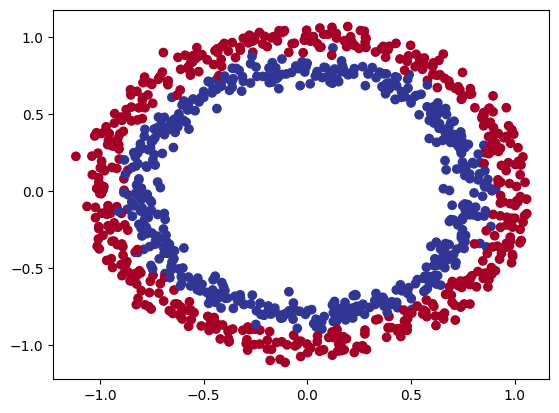

In [8]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu) # this is a colormap


### the data is working with is often referred to as a toy dataset because it's relatively simple
### it's small enough to understand but large enough to be non-trivial

In [9]:
# check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# view the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values for one sample: {X_sample}, label: {y_sample}")
print(f"shape of sample: {X_sample.shape} and label: {y_sample.shape}")


values for one sample: [0.74220688 0.24668576], label: 1
shape of sample: (2,) and label: ()


In [11]:
# create a train and test split
# turn data into tensors
import torch
from torch import nn
torch.__version__
print(torch.cuda.is_available())

True


In [12]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
X.dtype, y.dtype, type(X), type(y)


(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [14]:
# split data into training and test sets
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42) # 80% training and 20% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [15]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # input features = 2 (X1, X2) and output features = 5 (hidden layer with 5 neurons)
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # output layer with 1 neuron (binary classification)

       
        # activation function will be used in the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # X-> layer_1 -> activation (not used here) -> layer_2 (output layer)


# instantiate the model and send it to device (GPU or CPU)

model_0 = CircleModelV0().to(device="cuda")
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=1),
    nn.ReLU()
    
)

In [17]:
next(model_0.parameters()).device

device(type='cpu')

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2703,  0.5313],
                      [ 0.0856,  0.0833],
                      [-0.4245,  0.6788],
                      [-0.0448,  0.6515],
                      [-0.2874,  0.3768],
                      [-0.1282,  0.4157],
                      [ 0.0637,  0.0147],
                      [-0.4636,  0.0231],
                      [-0.5459, -0.5469],
                      [-0.5060,  0.0426],
                      [-0.1005, -0.4023],
                      [-0.4520, -0.2007],
                      [ 0.4564, -0.2693],
                      [ 0.2806, -0.0121],
                      [ 0.3830, -0.0226],
                      [-0.6448,  0.4019],
                      [ 0.2057, -0.3490],
                      [-0.1528,  0.1995],
                      [ 0.0404, -0.6382],
                      [ 0.6331, -0.4302],
                      [-0.5736, -0.3204],
                      [ 0.5482, -0.5075],
                      [ 0.2687,  0.4398],
        

In [19]:
# make predictions 

# with torch.inference_mode():
#     untrained_predictions = model_0(X_test.to(device="cuda"))
# print(f"length of the predictions tensor: {len(untrained_predictions)}")
# print(f"first 10 predictions:\n {untrained_predictions[:10]}")
# # check the shape of the predictions tensor

# print(f"shape of the predictions tensor: {untrained_predictions.shape}")
# # check the shape of the predictions tensor



In [20]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): ReLU()
)

In [21]:
# setting up loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss() # binary cross entropy with logits loss function means we don't need to apply sigmoid activation function to the output layer

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2703,  0.5313],
                      [ 0.0856,  0.0833],
                      [-0.4245,  0.6788],
                      [-0.0448,  0.6515],
                      [-0.2874,  0.3768],
                      [-0.1282,  0.4157],
                      [ 0.0637,  0.0147],
                      [-0.4636,  0.0231],
                      [-0.5459, -0.5469],
                      [-0.5060,  0.0426],
                      [-0.1005, -0.4023],
                      [-0.4520, -0.2007],
                      [ 0.4564, -0.2693],
                      [ 0.2806, -0.0121],
                      [ 0.3830, -0.0226],
                      [-0.6448,  0.4019],
                      [ 0.2057, -0.3490],
                      [-0.1528,  0.1995],
                      [ 0.0404, -0.6382],
                      [ 0.6331, -0.4302],
                      [-0.5736, -0.3204],
                      [ 0.5482, -0.5075],
                      [ 0.2687,  0.4398],
        

In [23]:
#  calculate accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [24]:
#  training the model
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits


tensor([[0.1313],
        [0.1078],
        [0.1670],
        [0.1301],
        [0.0576]])

In [25]:
# use the sigmoid activation function on our 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5328],
        [0.5269],
        [0.5416],
        [0.5325],
        [0.5144]])

In [26]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [27]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

# logits -> pred_probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))


# check for equality
print(torch.eq(y_preds.squeeze(),  y_pred_labels.squeeze()[:5])) # check if the predicted labels are equal to the true labels


# get rid of extra dimension
y_pred_labels.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], grad_fn=<SqueezeBackward0>)

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000




# build training and evaluation loop 
for epoch in range(epochs):
    model_0.train()
    
    # forward pass
    y_logits = model_0(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> labels
    
    # calculate loss/accuracy 
    # we need to pass logits to BceWithLogits expects raw logits
    loss = loss_fn(y_logits, 
                   y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward() # backpropagation
    
    optimizer.step() # update weights and biases
    
    # testing 
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # calculate the test loss 
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"epoch {epoch} | "
              f"train loss: {loss:.5f} | "
              f"train acc: {acc:.2f}% | "
              f"test loss: {test_loss:.5f} | "
              f"test acc: {test_acc:.2f}%")



epoch 0 | train loss: 0.69917 | train acc: 50.00% | test loss: 0.69702 | test acc: 50.00%
epoch 10 | train loss: 0.69370 | train acc: 53.87% | test loss: 0.69326 | test acc: 47.50%
epoch 20 | train loss: 0.69201 | train acc: 51.50% | test loss: 0.69186 | test acc: 48.00%
epoch 30 | train loss: 0.68960 | train acc: 54.12% | test loss: 0.68996 | test acc: 50.50%
epoch 40 | train loss: 0.68707 | train acc: 57.88% | test loss: 0.68803 | test acc: 50.00%
epoch 50 | train loss: 0.68454 | train acc: 56.88% | test loss: 0.68591 | test acc: 50.50%
epoch 60 | train loss: 0.68202 | train acc: 56.38% | test loss: 0.68384 | test acc: 51.00%
epoch 70 | train loss: 0.67950 | train acc: 56.12% | test loss: 0.68175 | test acc: 51.00%
epoch 80 | train loss: 0.67686 | train acc: 56.62% | test loss: 0.67956 | test acc: 51.00%
epoch 90 | train loss: 0.67405 | train acc: 55.88% | test loss: 0.67721 | test acc: 52.00%
epoch 100 | train loss: 0.67112 | train acc: 57.25% | test loss: 0.67482 | test acc: 51.00%

In [29]:
loss_fn

BCEWithLogitsLoss()

In [30]:
import requests
from pathlib import Path

# download helper functions if it's not already downloaded
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("downloading helper_functions.py...")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    )
    
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


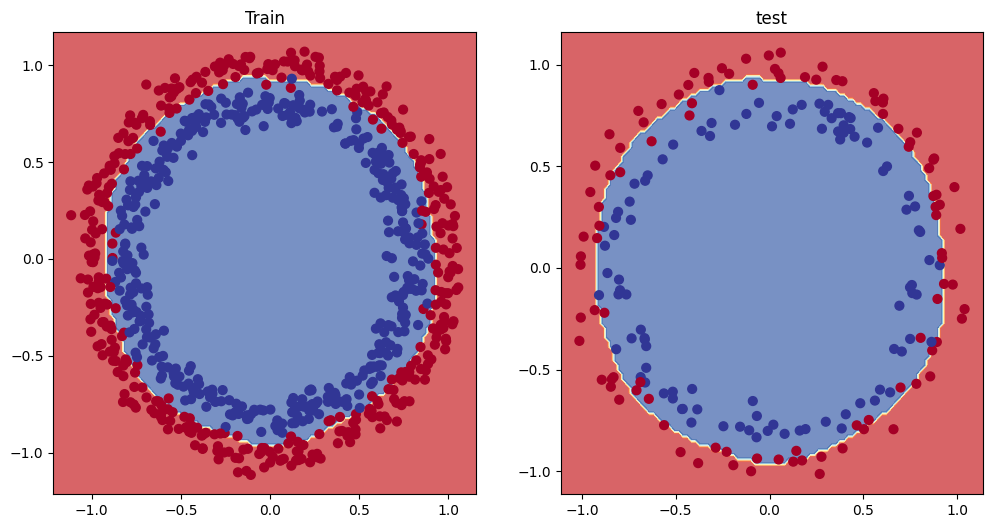

In [40]:
# plot decision boundary of a model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [32]:
# improving a model

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [33]:
model_1 = CircleModelV1().to(device="cuda")
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [34]:
# create loss function
loss_fn_1 = nn.BCEWithLogitsLoss()
# create an optimzer 
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [36]:
# training and evaluation loop

# training and evaluation loop

epochs_1 = 1000
for epoch in range(epochs_1):
    model_1.train()
    # Move tensors to CUDA
    X_train_cuda = X_train.to(device="cuda")
    y_train_cuda = y_train.to(device="cuda")
    
    # Forward pass
    y_logits_1 = model_1(X_train_cuda).squeeze()
    y_pred_1 = torch.round(torch.sigmoid(y_logits_1))

    # Compute loss and accuracy
    loss_1 = loss_fn_1(y_logits_1, y_train_cuda)
    acc = accuracy_fn(y_true=y_train_cuda, y_pred=y_pred_1)
    
    optimizer.zero_grad()  # Clear gradients after each step


    # Backward pass and optimization
    loss_1.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        X_test_cuda = X_test.to(device="cuda")
        y_test_cuda = y_test.to(device="cuda")
    
        test_logits_1 = model_1(X_test_cuda).squeeze()
        test_pred_1 = torch.round(torch.sigmoid(test_logits_1))
        test_loss_1 = loss_fn_1(test_logits_1, y_test_cuda)
        test_acc_1 = accuracy_fn(y_true=y_test_cuda, y_pred=test_pred_1)

    if epoch % 10 == 0:
        print(
            f"epoch {epoch} | "
            f"train loss: {loss_1:.5f} | "
            f"train acc: {acc:.2f}% | "
            f"test loss: {test_loss_1:.5f} | "
            f"test acc: {test_acc_1:.2f}%"
        )

epoch 0 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 10 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 20 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 30 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 40 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 50 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 60 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 70 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 80 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 90 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%
epoch 100 | train loss: 0.69393 | train acc: 51.00% | test loss: 0.69263 | test acc: 51.00%

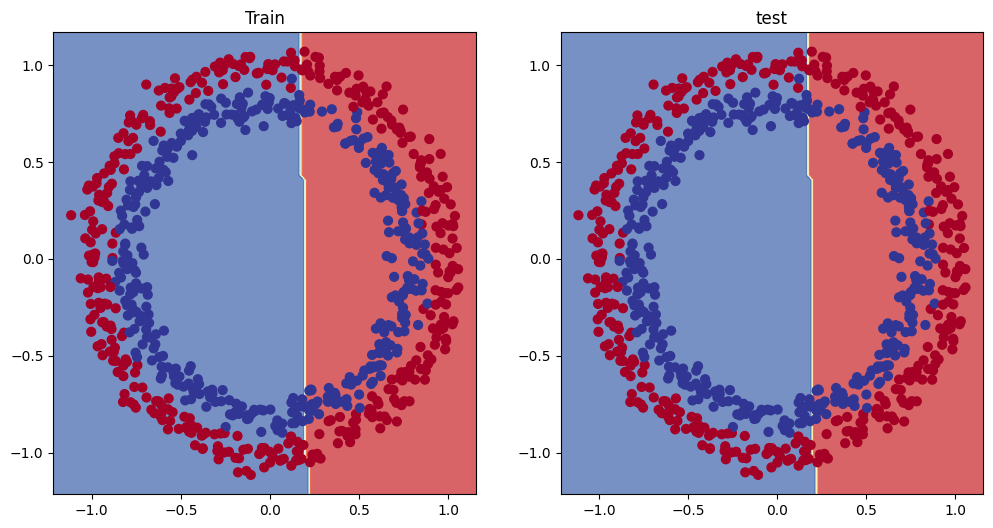

In [41]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_train, y_train)

# preparing data to see our model will fit the data in a straight line



In [43]:
# create some data same as linear regression 

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y_regression = weight * X + bias

len(X_regression), len(y_regression)

X_regression, y_regression

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560,

In [44]:
# train test split 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X[:train_split], y[:train_split]
X_test_regression, y_test_regression = X[train_split:], y[train_split:]


len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(40, 40, 10, 10)